# Fashion MNIST
#### El conjunto de datos Fashion MNIST es una alternativa moderna al clásico MNIST, diseñada para representar imágenes de artículos de moda en lugar de dígitos escritos a mano.

#### Este dataset es utilizado para probar modelos de clasificación de imágenes con redes neuronales. Contiene:
#### - 60,000 imágenes de entrenamiento y 10,000 imágenes de prueba.
#### - Cada imagen es en escala de grises de 28 × 28 píxeles.
#### - 10 clases, representando distintos tipos de ropa y accesorios.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import confusion_matrix, classification_report

2025-03-13 21:42:10.423945: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-13 21:42:10.431159: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741920130.440023   73516 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741920130.442590   73516 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-13 21:42:10.451812: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## Cargar el Dataset Fashion MNIST

In [2]:
# Cargar Fashion MNIST desde Keras
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Mostrar dimensiones de los datos
print(f"Dimensiones de x_train: {x_train.shape}")  # (60000, 28, 28)
print(f"Dimensiones de x_test: {x_test.shape}")    # (10000, 28, 28)


Dimensiones de x_train: (60000, 28, 28)
Dimensiones de x_test: (10000, 28, 28)


## Visualizar Algunas Imágenes del Dataset

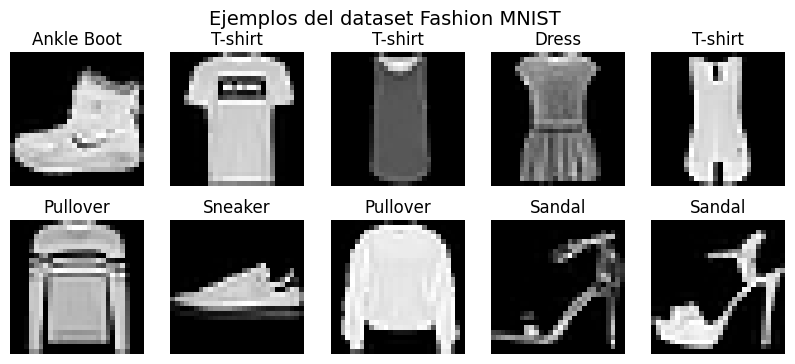

In [3]:
# Definir nombres de las clases
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

# Mostrar algunas imágenes de Fashion MNIST
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.suptitle("Ejemplos del dataset Fashion MNIST", fontsize=14)
plt.show()


## Visualizar la Distribución de Clases

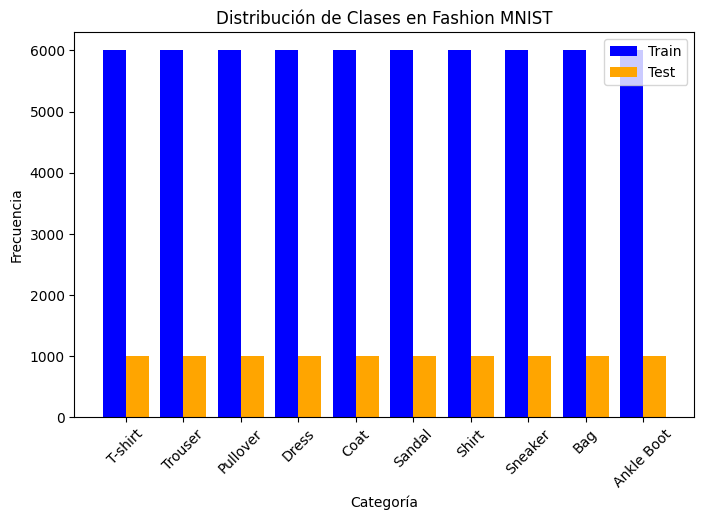

In [4]:
# Contar elementos por clase en los conjuntos de entrenamiento y prueba
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

# Crear gráfico de barras
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(unique_train - 0.2, counts_train, width=0.4, label="Train", color="blue")
ax.bar(unique_test + 0.2, counts_test, width=0.4, label="Test", color="orange")

# Personalizar gráfico
ax.set_xticks(unique_train)
ax.set_xticklabels(class_names, rotation=45)
ax.legend()
plt.title("Distribución de Clases en Fashion MNIST")
plt.xlabel("Categoría")
plt.ylabel("Frecuencia")
plt.show()


## Preprocesamiento de Datos

In [5]:
# Normalizar los valores de los píxeles al rango [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

## Definir y entrenar el Modelo de Red Neuronal

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Convertir imagen en un vector
    keras.layers.Dense(128, activation="relu"),  # Capa oculta con 128 neuronas
    keras.layers.Dropout(0.2),  # Regularización para evitar sobreajuste
    keras.layers.Dense(10, activation="softmax")  # Capa de salida con 10 clases
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

start = time.time()

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

finish = time.time()
print(f"\nTiempo de entrenamiento: {finish - start:.2f} segundos")

/home/gustavo/.virtualenvs/tf/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1741920146.093969   73516 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5541 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:01:00.0, compute capability: 8.9


Epoch 1/10


I0000 00:00:1741920146.829312   73663 service.cc:148] XLA service 0x71643c004620 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741920146.829337   73663 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
2025-03-13 21:42:26.839639: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741920146.880706   73663 cuda_dnn.cc:529] Loaded cuDNN version 90701


 214/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 707us/step - accuracy: 0.6113 - loss: 1.1615

I0000 00:00:1741920147.420785   73663 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1842/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.7591 - loss: 0.6906

2025-03-13 21:42:28.855010: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 4 bytes spill stores, 4 bytes spill loads



1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7600 - loss: 0.6878 - val_accuracy: 0.8404 - val_loss: 0.4390
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - accuracy: 0.8512 - loss: 0.4122 - val_accuracy: 0.8541 - val_loss: 0.3978
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - accuracy: 0.8657 - loss: 0.3676 - val_accuracy: 0.8584 - val_loss: 0.3880
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 801us/step - accuracy: 0.8732 - loss: 0.3475 - val_accuracy: 0.8657 - val_loss: 0.3714
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - accuracy: 0.8752 - loss: 0.3364 - val_accuracy: 0.8744 - val_loss: 0.3529
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step - accuracy: 0.8819 - loss: 0.3202 - val_accuracy: 0.8711 - val_loss: 0.3551
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - accuracy: 0.8843 - loss: 0.3090 - val_accuracy: 0.8795 - val_loss: 0.3424
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - accuracy: 0.8883 - loss: 0.2987

## Evaluar el modelo

313/313 - 0s - 635us/step - accuracy: 0.8736 - loss: 0.3495

Precisión en el conjunto de prueba: 0.8736
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step


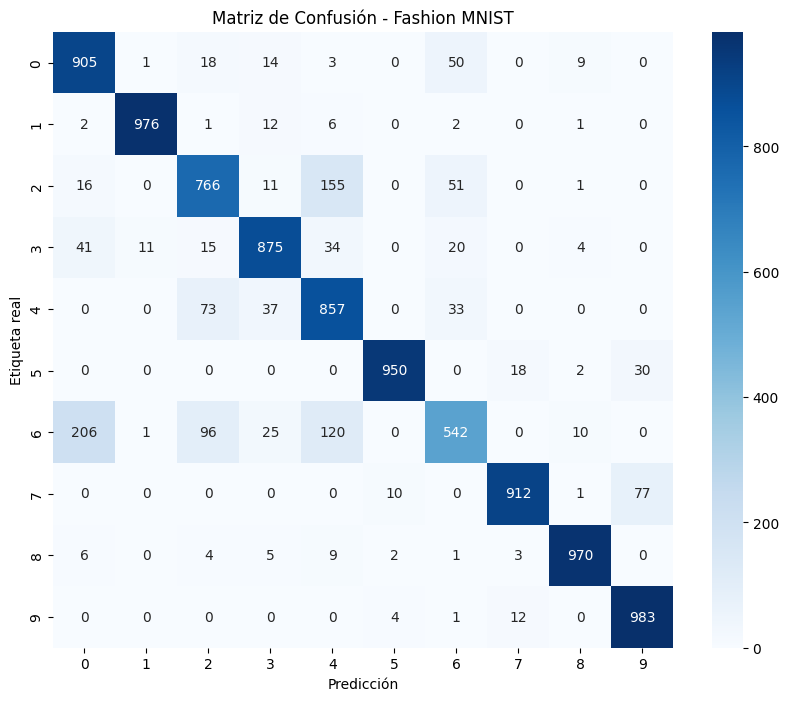

In [8]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nPrecisión en el conjunto de prueba: {test_acc:.4f}")

# Obtener predicciones
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Mostrar matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión - Fashion MNIST")
plt.show()
